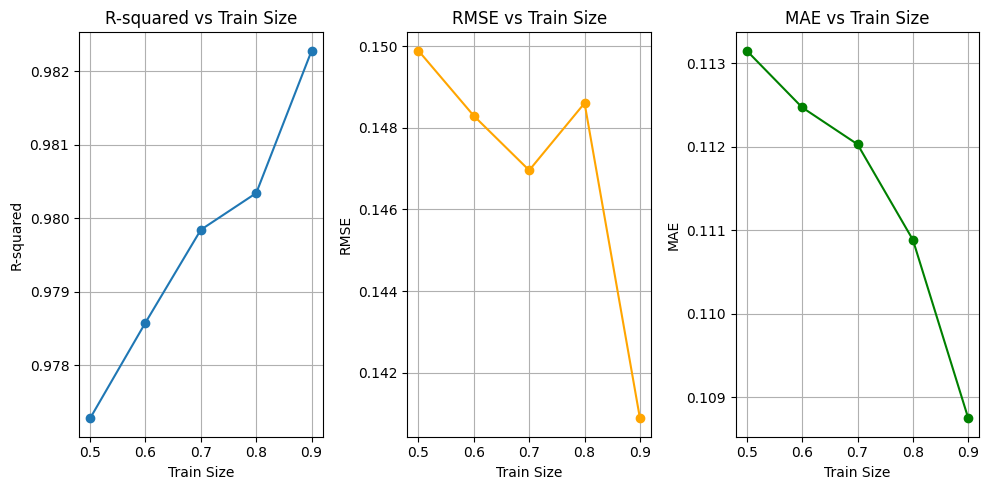

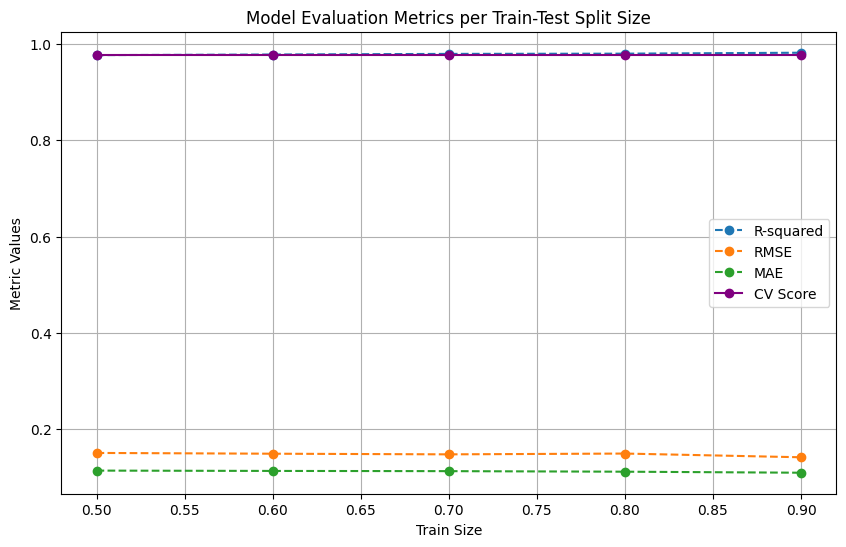

Hasil Evaluasi Model:
   Train Size  R-squared      RMSE       MAE  Accuracy
0         0.5   0.977278  0.149891  0.113148  0.980197
1         0.6   0.978580  0.148294  0.112469  0.979210
2         0.7   0.979844  0.146959  0.112027  0.978860
3         0.8   0.980343  0.148606  0.110883  0.978891
4         0.9   0.982280  0.140878  0.108746  0.978942

Hasil Cross-Validation:
   Train Size  CV Score
0         0.5  0.978521
1         0.6  0.978521
2         0.7  0.978521
3         0.8  0.978521
4         0.9  0.978521


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Pre-processing data
# Calculating BMI
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

# Standardization of numerical data
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                      'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
                      'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Label encoding for categorical columns
categorical_features = ['Gender', 'Workout_Type', 'Experience_Level']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data and training models
train_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]
X = df.drop(columns=['Calories_Burned'])
y = df['Calories_Burned']

# Initialize results
results = []
for train_size in train_sizes:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Training model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Model evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = model.score(X_train, y_train)

    results.append({'Train Size': train_size, 'R-squared': r2, 'RMSE': rmse, 'MAE': mae, 'Accuracy': accuracy})

# Results table
results_df = pd.DataFrame(results)

# Cross-validation
cv_results = []
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = LinearRegression()
    cv_score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    cv_results.append({'Train Size': train_size, 'CV Score': cv_score})
cv_results_df = pd.DataFrame(cv_results)

# Plot each metric separately
plt.figure(figsize=(10, 5))

# R-squared
plt.subplot(1, 3, 1)
plt.plot(results_df['Train Size'], results_df['R-squared'], marker='o', label='R-squared')
plt.title('R-squared vs Train Size')
plt.xlabel('Train Size')
plt.ylabel('R-squared')
plt.grid(True)

# RMSE
plt.subplot(1, 3, 2)
plt.plot(results_df['Train Size'], results_df['RMSE'], marker='o', label='RMSE', color='orange')
plt.title('RMSE vs Train Size')
plt.xlabel('Train Size')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 3, 3)
plt.plot(results_df['Train Size'], results_df['MAE'], marker='o', label='MAE', color='green')
plt.title('MAE vs Train Size')
plt.xlabel('Train Size')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Combined Plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Train Size'], results_df['R-squared'], label='R-squared', marker='o', linestyle='--')
plt.plot(results_df['Train Size'], results_df['RMSE'], label='RMSE', marker='o', linestyle='--')
plt.plot(results_df['Train Size'], results_df['MAE'], label='MAE', marker='o', linestyle='--')
plt.plot(cv_results_df['Train Size'], cv_results_df['CV Score'], label='CV Score', marker='o', color='purple', linestyle='-')

plt.title('Model Evaluation Metrics per Train-Test Split Size')
plt.xlabel('Train Size')
plt.ylabel('Metric Values')
plt.legend()
plt.grid(True)
plt.show()

# Print out the results
print("Hasil Evaluasi Model:")
print(results_df)
print("\nHasil Cross-Validation:")
print(cv_results_df)